# Tarea 6

_Tarea 6_ de _Benjamín Rivera_ para el curso de __Métodos Numéricos__ impartido por _Joaquín Peña Acevedo_. Fecha limite de entrega __11 de Octubre de 2020__.

In [2]:
import sys
import seaborn as sns
import scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular # Para backward y forward substitution
from local.utils import *

from local.Tarea4 import solChol

NOTEBOOK = True

## Ejercicio 1

In [3]:
# Parte 1
# Matriz traspuesta
'''
def traspuesta(A,/, dtype=np.float32):
    """ Funcion que regresa la matriz traspuesta. """
    sz = A.shape
    ret = np.zeros((sz[1], sz[0]),
                   dtype=dtype)
    
    for i in range(sz[0]):
        for j in range(sz[1]):
            ret[j,i] = A[i,j]
            
    return ret
'''
#  Demostracion de poder X'D
# en el programa se usara la implementacion de numpy para las clases matrix,
# array, etc... de la funcion transpose

# Parte 2
# Producto de matrices
'''
def prodMat(A, B,/, dtype=np.float32):
    szA = A.shape
    szB = B.shape
    
    if szA[1] == szB[0]:
        ret = np.zeros((szA[0], szB[1]), dtype=dtype)
        
        for i in range(szA[0]):
            for j in range(szB[1]):
                ret[i,j] = sum(A[i,k]*B[k,j] for k in range(szA[1]))
        return ret
    else:
        raise Exception("No coinciden las dimensiones")
'''
#  Demostracion de poder X'D
# en el programa se usara la implementacion de numpy para las clases matrix,
# array, etc... de la aritmetica de matrices A@B
None

In [4]:
# Parte 3
# Solucion de minimos cuadrados

def minimosCuadrados(A, b,/, dtype=np.float64):
    """ Funcion que calcula la solucion de minimos cuadrados.
    
    Funcion que calcula la solucion de minimos cuadrado. Para
    esto se basa de funciones ya implementadas para calcular
    A^t@A y A^tb, para luego calcular la solucion del sitema
    A^t@Ax = A^tb con fact de Cholesky.
    
    La funcion devuelve la solucion del sistema x si se encontro
    y None en caso de que no se haya encontrado.
    
    A pesar de que la funcion tambien pide que se pasen las
    dimensiones de las matrices, la forma pythonica no lo 
    requiere; por lo que seran obtenidas dentro del metodo.
    
    Input:
        A := apuntador a matriz A
        b := apuntador a vector b
        
    Output:
        x := si existe sus valors; None en otro caso
    """
    x = np.zeros((A.shape[0],1))
        
    At = A.transpose()@A
    yt = A.transpose()*b
    
    return solChol(At, At.shape[0], yt)

In [5]:
# PArte 4

def get2Dvec(path,/, dtype=np.float64, info=True):
    """ Funcion para cargar vector 2D.
    
    Esta funcion tratara de cargar un vector 2D de unarchivo
    de texto que tenga dos columnas (correspondientes a dos
    vectores y separada por un espacio) con k filas (donde k
    es el tamanio de los vectores que estan separados por \n)
    
    Los datos los guardaremos en una instancia de np.matrix
    
    Input:
        path := direccion del archivo para cargar los
            vectores
            
        dtype := tipo de dato para usar
        info := Indica si queremos extraer la informacion
    Output:
        (ret, info)
        ret := np.matrix de (2,k)
        info := Para evitar tener que hacer otro recorrido
            sobre el arreglo se puede extraer informacion
            en este recorrido
            minx := El minimo valor de x
            maxx := El maximo valor de x
    """
    
    try:
        if info: #Declarar info
            ret_info = {'minx':  np.Inf,
                        'maxx': -np.Inf}
        
        with open(path, 'r') as file:
            
            ret = [[],[]]
            for line in file:
                line = list(map(lambda x:dtype(x), 
                                line.split(' ')))
                ret[0].append( line[0] )
                ret[1].append( line[1] )
                
                # Extrar info
                if info:
                    # min
                    ret_info['minx'] = min(ret_info['minx'], line[0])
                    # max
                    ret_info['maxx'] = max(ret_info['maxx'], line[0])
        
        if info:
            return np.matrix(ret, dtype=dtype), ret_info
        else:
            return np.matrix(Ret, dtype=dtype)
    except:
        raise Exception("Error al cargar el archivo")

def plot_ej1_1(x, y):
    """ Funcion 1 para graficar resultados. 
    
    Esta funcion buscca graficar los datos recibidos para poder
    tomar la mejor decision respecto al grado a utilizar en la
    aproximacion a polinomios.
    
    Input:
        x := Valores de cordenadas x
        y := Valores de cordenadas y
    """
    fig, ax = plt.subplots()
    sns.scatterplot(x, y, ax=ax)
    plt.show()

def plot_ej1_2(x, y, f, rng):
    """ Funcion 2 para graficar resultados
    
    Esta funcion busca graficar los datos recibidos para mostrar
    la posible eproximacion obtenida por el metodo.
    Input:
        x := Valores de cordenadas x
        y := Valores de cordenadas y
        f := Funcion polinomica obtenida
        rng := particion del rango para graficar
    """
    yf = [f(cx) for cx in rng]
    fig, ax = plt.subplots()
    sns.scatterplot(x, y, ax=ax)
    ax.plot(rng, yf, linestyle= "-")
    plt.show()

def error_ej1(p, x, y):
    """ Funcion para calcular error del polinomio. """
    return sum((p(x[i]) - y[i])**2 for i in range(len(x))) 
    
    
def Ejercicio1(d, n_tabla, n,/,path='datos/', dtype=np.float64, plot=True, prnt=True, ask=True):
    # Cargar datos
    tabla, info = get2Dvec(path+n_tabla, 
                           dtype=dtype)
    # Valores obtenidos
    x = np.ravel(tabla[0,:])
    y = np.ravel(tabla[1,:])
    rng = np.linspace(info['minx'], info['maxx'], num=d)
    
    if plot and ask: 
        plot_ej1_1(x,y)
        try:
            print(f"Seguro que quieres usar grado {n} para aproximar?")
            inp = input("[S para mantener]: ").lower().strip()

            if not inp.startswith('s'):
                n = int(inp)
        finally:
            if prnt: print(f'n={n}')
    
    """
    #----------------opt implementada por numpy ----------------------------
    if prnt: print('opt1')
    f = f_polinomio(np.polyfit(x, y, n))
    if plot: plot_ej1_2(x, y, f, rng)
    
    #--------------opt autoimplementada pot yo -----------------------------
    if prnt: print('opt2')
    """
    
    sz = len(x)
    if n < sz:
        # Crear matriz a
        A = np.ones((sz, n+1), 
                    dtype=dtype)
        for i in range(n):
            A[:,i] = np.power(tabla[0,:], n-i)
        # vector y
        b = np.matrix(tabla[1,:]).transpose()

        coef = minimosCuadrados(A, b)
        p = f_polinomio(coef)
        write2Dvec(path+'resp-'+n_tabla, x, [p(xi) for xi in x])

        if plot: 
            plot_ej1_2(x, y, p, rng)
        if prnt:
            print(f'Se encontraron los coeficientes')
            print('\t'+show1D(coef, show=False))
            print(f'Error = {error_ej1(p, x, y)}')
    else:
        raise Exception("Sistema indeterminado")

### Conjunto 1

Claramente se puede apreciar una parabola, por eso mi primer intento fue tratar de conseguir un polinomio de grado $2$. Esto es dificil de mejorar, dado la dispercion de los puntos, ademas con n's muy grandes empeiza a sufrir de _overfitting_ y no mejora el error; esto se puede apreciar en el segundo intento con $n = 11$

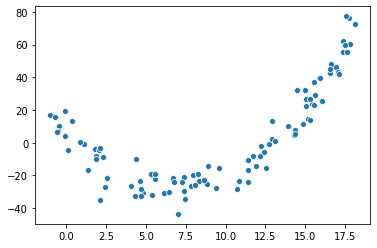

Seguro que quieres usar grado 2 para aproximar?
n=2


KeyboardInterrupt: Interrupted by user

In [6]:
# Parte 5
if NOTEBOOK:
    Ejercicio1(50, 'puntos2D_conjunto1.txt', 2)

In [ ]:
if NOTEBOOK:
    Ejercicio1(50, 'puntos2D_conjunto1.txt', 11, ask=False)

 ### Conjunto 2
 
 Respecto al conjunto dos lo primero que pense es que correspondia a una funcion de grado 3, sin embargo el error queda bastante grande. En el segundo intento pense que probablemente un polinomio de grado $5$ se ajustaria mejor, lo que mejoro considerablemente, ya que ahora el valor es $\sim 1$. En otros intentos\footnote{Que no agregare a este reporte por ser muchos y muy a prueba y error} vi que para bajar el error de $0$ es necesario tomar un polinomio de grado $12$, que ya me parece que recolecta demasiada informacion que podria no ser relevante.

In [ ]:
if NOTEBOOK:
    Ejercicio1(50, 'puntos2D_conjunto2.txt', 3)

In [ ]:
if NOTEBOOK:
    Ejercicio1(50, 'puntos2D_conjunto2.txt', 11, ask=False)

 ### Conjunto 3
 
Claramente podemos ver una distribucion normal en los puntos dispersos que se muestran. El primer polinomio que tenia una apariencia similar a esta fue el de grado $4$, el cual daba un error $\sim 2$. Despues de eso la siguiente mejora considerable fue la del polinomio de grado $6$, que daba un error $\sim 0.5$

In [ ]:
if NOTEBOOK:
    Ejercicio1(50, 'puntos2D_conjunto3.txt', 4, ask=False)

In [ ]:
if NOTEBOOK:
    Ejercicio1(50, 'puntos2D_conjunto3.txt', 6, ask=False)

## Como ejecutar

##### Requerimientos

Este programa se ejecuto en mi computadora con la version de __Python 3.8.2__ y con estos
[requerimientos](https://github.com/BenchHPZ/UG-Compu/blob/master/MN/requerimientos.txt)

#### Jupyter

En caso de tener acceso a un _servidor jupyter_ ,con los requerimientos antes mencionados, unicamente basta con ejecutar todas las celdas de este _notebook_. Probablemente no todas las celdas de _markdown_ produzcan el mismo resultado por las 
[_Nbextensions_](jupyter-contrib-nbextensions.readthedocs.io).

#### Consola

Habrá archivos e instrucciones para poder ejecutar cada uno de los ejercicios desde la consola.

In [ ]:
usage = """
Programa correspondiente a la Tarea 6 de Metodos Numericos. 
Este programa espera leer los archivos de tipo npy

Alumno: Benjamin Rivera

Usage:
  Tarea6.py ejercicio1 <d> <tabla> <n> [options]
  Tarea6.py -h | --help

Options:
  --path=<path>   Directorio para buscar archivos [default: datos/].
  -p --nplot      Para no graficar los resultados
  -s --nshow      Para no imprimir los resultados secundarios
  -a --nask       Para no preguntar
  -h --help       Show this screen.
  -v --version    Show version.
"""

if __name__ == "__main__" and not NOTEBOOK:

    import doctest
    from docopt import docopt

    doctest.testmod()
    args = docopt(usage, version='Tarea6. Benjamin Rivera')
    print(args)


    if args['ejercicio1']:
        Ejercicio1(args['<d>'], args['<tabla>'], args['<n>'], 
                   path= args['--path'],       #Path para buscar archivo
                   plot= not(args['--nplot']), #Indcacion para graficar
                   prnt= not(args['--nshow']), #Indicacion para imprimir en consola
                   ask = not(Args['--nask']) ) #Indicacion para preguntar
